In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Set the theme for seaborn
sns.set_theme()

# Suppress warnings
warnings.filterwarnings('ignore')


# Get Data

In [91]:
train = pd.read_csv('train-data.csv')
train.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


 # **EDA**

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [93]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [94]:
train.describe(include="O")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


* Unnamed:0 & New_Price columns we don't need them
* Mileage & Engine & Power columns should convert to numric Columns

In [95]:
# Drop Unnamed:0 & New_Price columns 
train.drop(columns=["Unnamed: 0","New_Price"] , inplace = True)

In [96]:
train['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [97]:
# Function to convert 'Engine' column to numeric
def convert_engine_to_numeric(engine_str):
    if isinstance(engine_str, str):
        return float(engine_str.split()[0])
    else:
        return np.nan

# Apply the function to the 'Engine' column
train['Engine'] = train['Engine'].apply(convert_engine_to_numeric)
train['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [98]:
train['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [99]:
# Function to convert 'Engine' column to numeric
def convert_power_to_numeric(power_str):
    if isinstance(power_str, str):
        try:
            return float(power_str.split()[0])
        except ValueError:
            return np.nan  
    else:
        return np.nan

# Apply the function to the 'Engine' column
train['Power'] = train['Power'].apply(convert_power_to_numeric)
train['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

In [100]:
train['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [101]:
# Function to convert 'Mileage' column to numeric
def convert_mileage_to_numeric(mileage_str):
    if mileage_str.split()[1] == "km/kg":
        return (mileage_str.split()[0] * 0.7)
    elif mileage_str.split()[1] == "kmpl":
         return mileage_str.split()[0]
    else:
        return np.nan

# Apply the function to the 'Mileage' column
train['Mileage(kmpl)'] = train['Mileage'].apply(convert_power_to_numeric)
train['Mileage(kmpl)']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage(kmpl), Length: 6019, dtype: float64

In [102]:
# drop the old column
train.drop(columns=["Mileage"] , inplace = True)

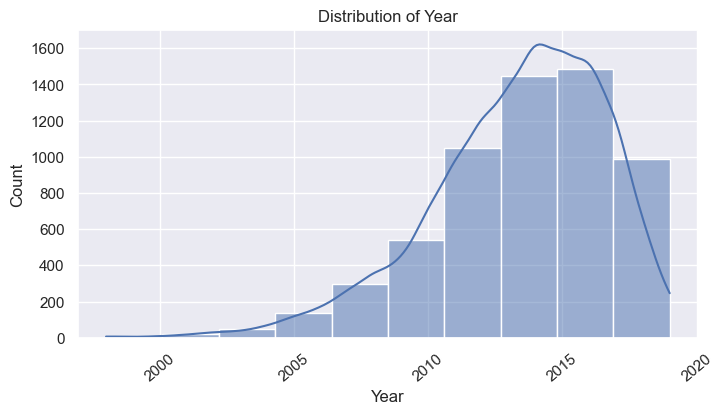

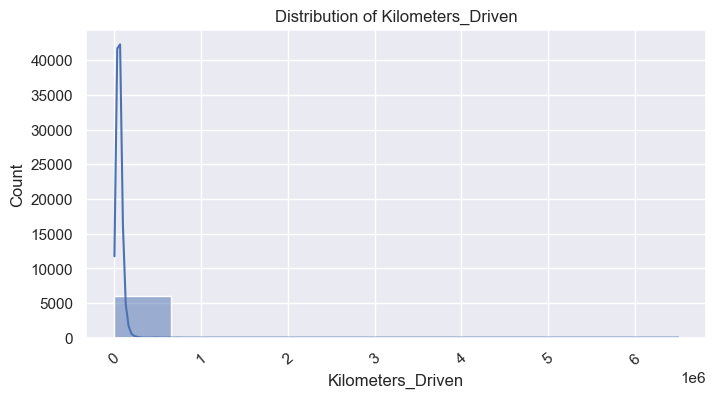

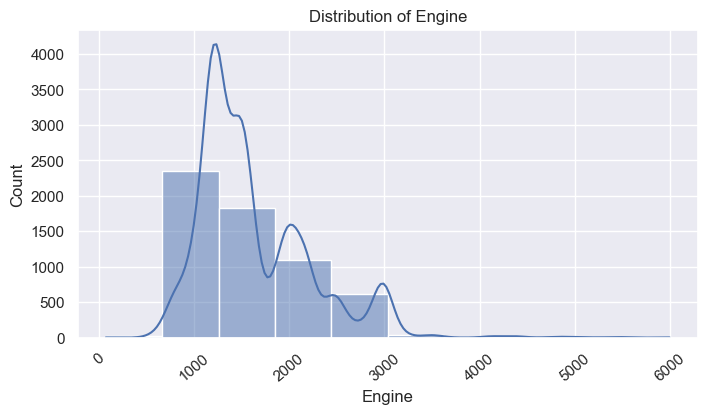

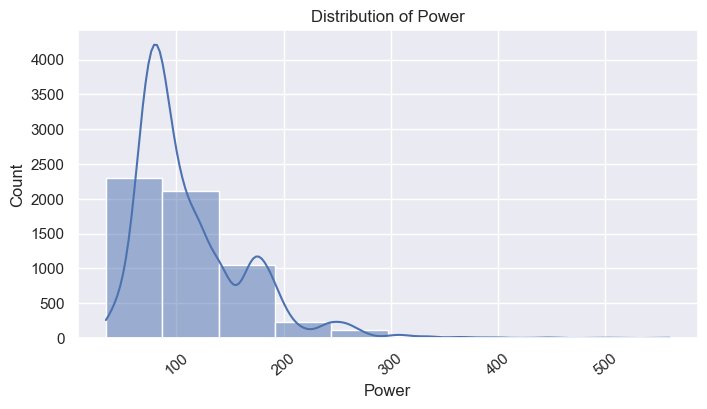

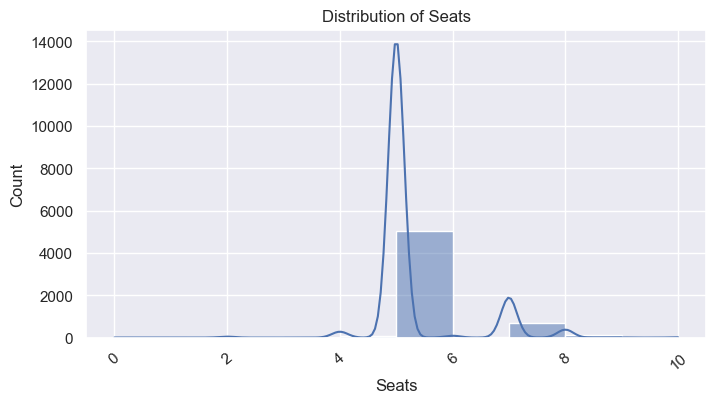

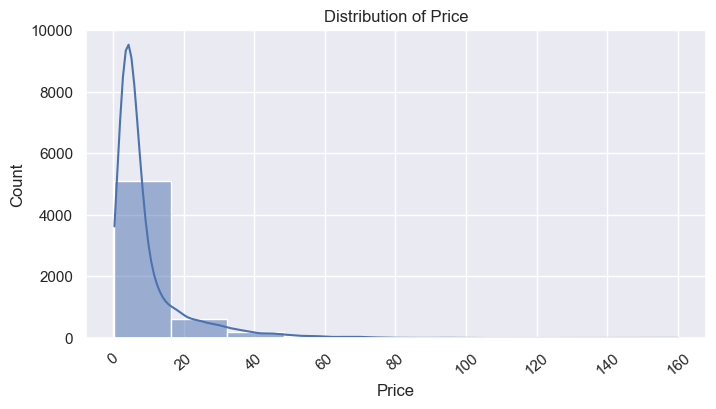

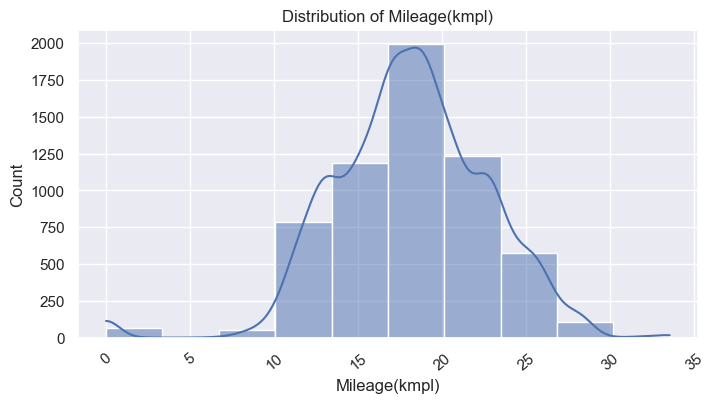

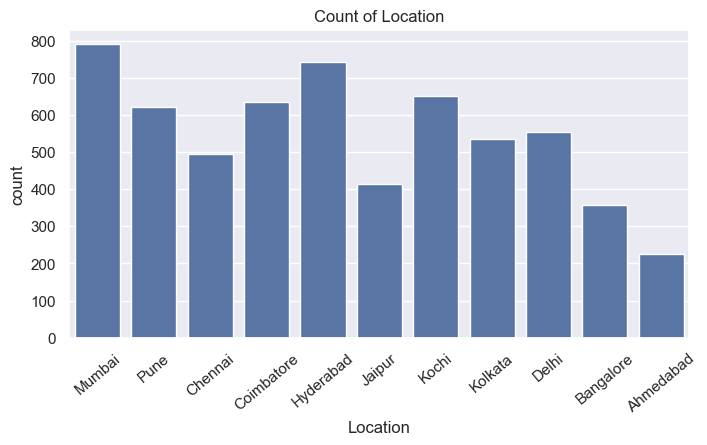

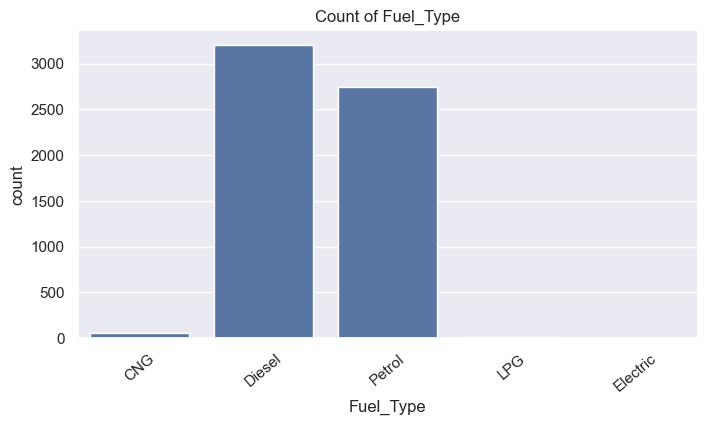

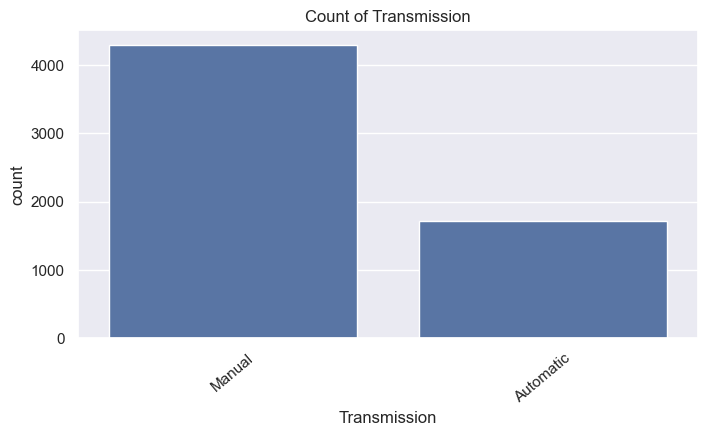

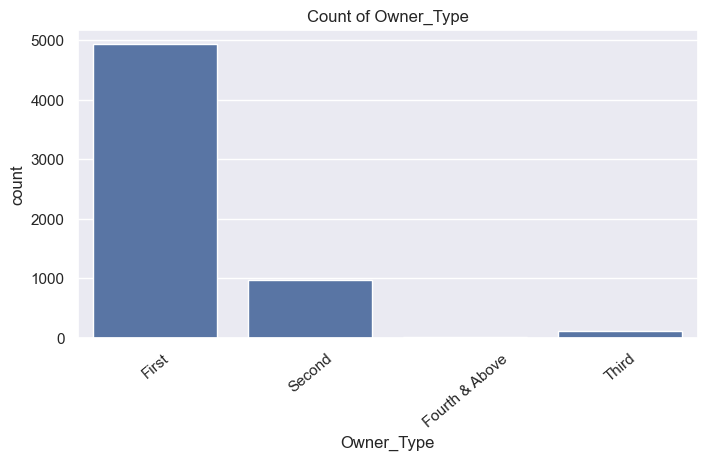

In [103]:
# List numerical and categorical columns
train_num = train.select_dtypes(include='number').columns.tolist()
train_cat = train.select_dtypes(include='object').columns.tolist()
train_cat = list(filter(lambda col: col != 'Name' , train_cat))

# Plot distributions for numerical columns
for column in train_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=40)
    plt.show()

# Plot counts for categorical columns
for column in train_cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=40)
    plt.show()

In [104]:
# show sample of data
train.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage(kmpl)
3837,Maruti Wagon R LXI BS IV,Kolkata,2017,8000,Petrol,Manual,First,998.0,67.04,5.0,3.00,20.51
1781,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2013,51450,Diesel,Manual,First,2494.0,102.00,7.0,10.40,12.80
4284,Toyota Innova Crysta 2.8 ZX AT,Delhi,2016,42000,Diesel,Automatic,First,2755.0,171.50,7.0,19.60,11.36
5602,Toyota Innova 2.5 G (Diesel) 8 Seater,Hyderabad,2016,81424,Diesel,Manual,First,2494.0,100.60,8.0,14.49,12.99
930,Maruti Zen Estilo 1.1 LXI BSIII,Bangalore,2007,60000,Petrol,Manual,Second,1061.0,64.00,5.0,1.65,18.20


* We Need Multiply the Price column by 1000 
* We can Extract The name of Brand Car of Name Column
* We can Extract The name of Model Car of Name Column
* We can Extract The Car age of Year Column

# Feature Engineering

In [105]:
#Multiply the Price column by 1000
train["Price"] = train["Price"] * 1000

In [106]:
#Extract The name of Brand Car of Name Column
train['Brand'] = train['Name'].apply(lambda x: x.split()[0])
train['Model'] = train['Name'].apply(lambda x: x.split()[1])
train['Brand'] , train['Model']

(0          Maruti
 1         Hyundai
 2           Honda
 3          Maruti
 4            Audi
           ...    
 6014       Maruti
 6015      Hyundai
 6016     Mahindra
 6017       Maruti
 6018    Chevrolet
 Name: Brand, Length: 6019, dtype: object,
 0        Wagon
 1        Creta
 2         Jazz
 3       Ertiga
 4           A4
          ...  
 6014     Swift
 6015     Xcent
 6016      Xylo
 6017     Wagon
 6018      Beat
 Name: Model, Length: 6019, dtype: object)

In [107]:
#show the new column
train['Brand'].nunique() , train['Brand'].unique()

(31,
 array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
        'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
        'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
        'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
        'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
        'Lamborghini'], dtype=object))

In [108]:
#show the new column
train['Model'].nunique() , train['Model'].unique()

(212,
 array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
        'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
        'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
        'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
        'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
        'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
        'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
        'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
        'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
        'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
        'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
        'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
        'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
        'Celerio', 'Sumo', 'Accord', '6', 'Manza'

In [109]:
#Extract The Car age of Year Column
train['Age'] = train['Age'] = pd.Timestamp.now().year - train['Year']
train['Age']

0       14
1        9
2       13
3       12
4       11
        ..
6014    10
6015     9
6016    12
6017    11
6018    13
Name: Age, Length: 6019, dtype: int64

In [110]:
# drop unused Column
train.drop(columns=["Name"] , inplace = True)

In [111]:
# show sample of data
train.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage(kmpl),Brand,Model,Age
3112,Hyderabad,2009,156056,Diesel,Manual,First,2494.0,102.00,8.0,8500.0,12.80,Toyota,Innova,15
1104,Coimbatore,2015,53735,Diesel,Automatic,Second,2967.0,241.40,7.0,38940.0,12.07,Audi,Q7,9
1978,Mumbai,2015,35770,Petrol,Manual,First,1373.0,91.10,5.0,5950.0,20.73,Maruti,Ciaz,9
3738,Coimbatore,2016,29091,Petrol,Manual,First,1197.0,81.86,5.0,4870.0,18.90,Hyundai,Grand,8
2190,Kochi,2016,46936,Diesel,Automatic,First,2143.0,204.00,5.0,29600.0,13.00,Mercedes-Benz,E-Class,8


# Correlation

In [112]:
train.select_dtypes(include=['number']).corr()["Price"].apply(lambda x: abs(x)).nlargest()

Price            1.000000
Power            0.772566
Engine           0.658354
Mileage(kmpl)    0.306593
Age              0.305327
Name: Price, dtype: float64

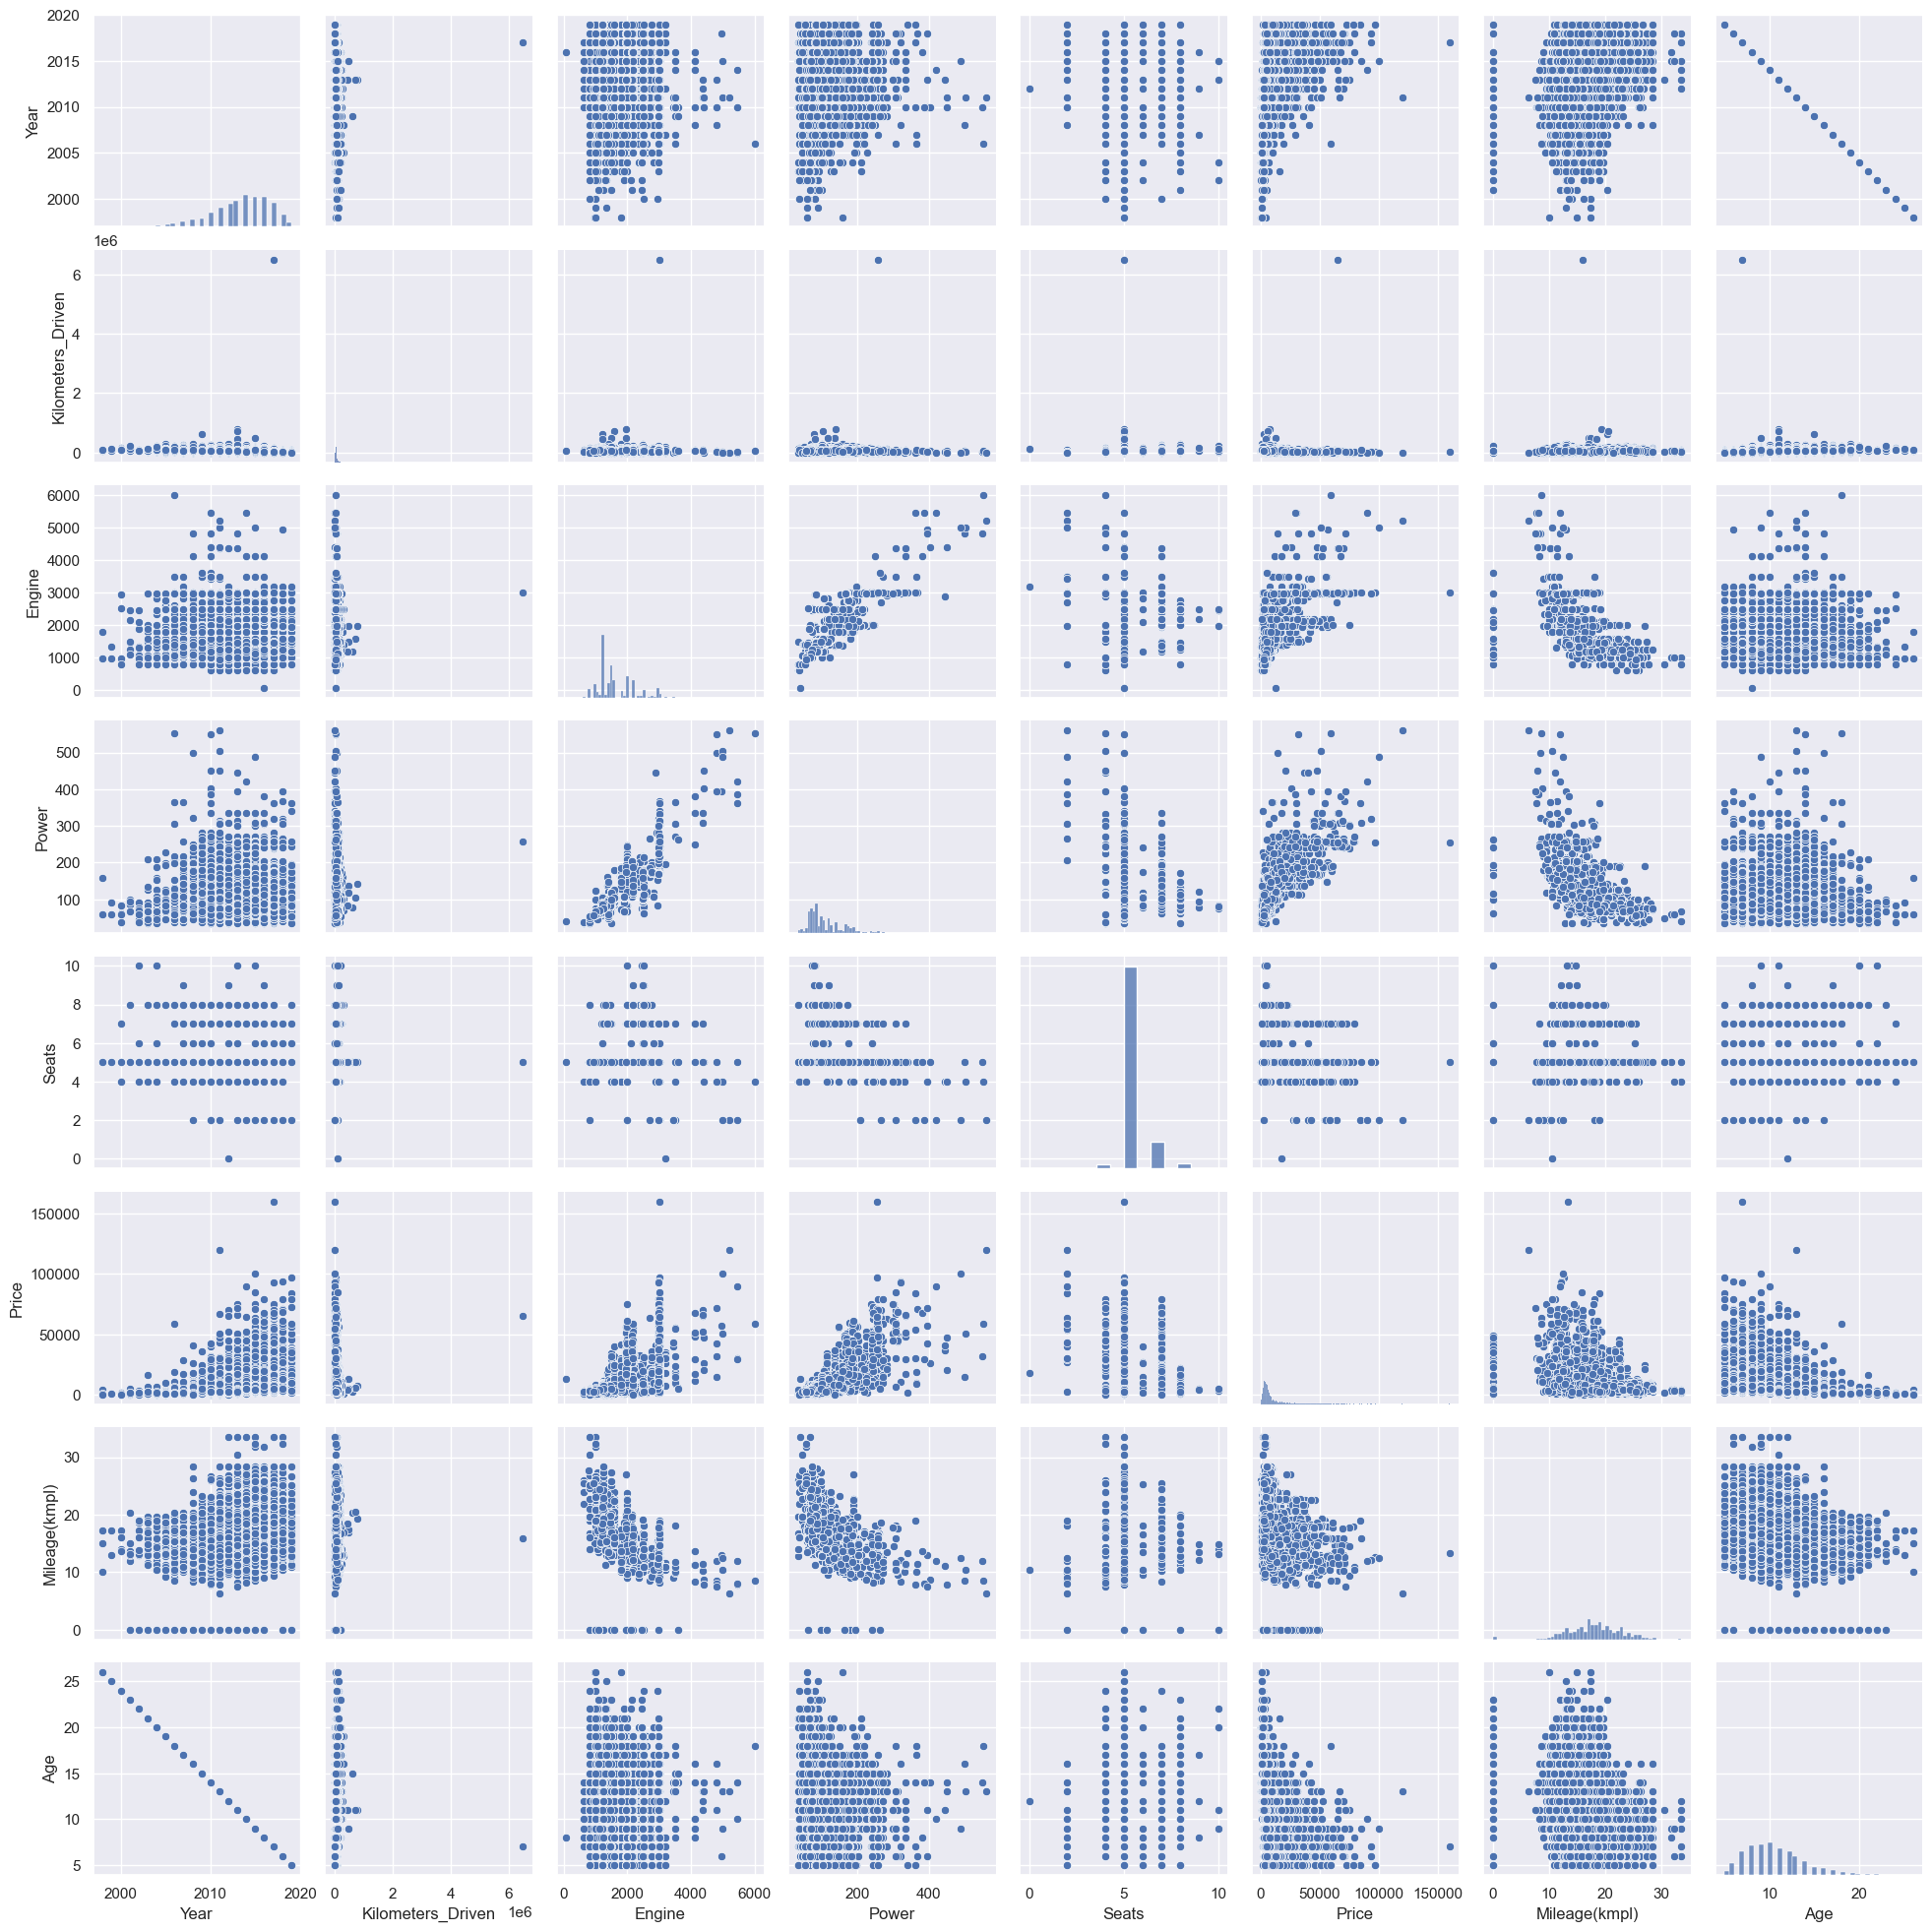

In [113]:
sns.pairplot(train)

The Power & Engine Columns Most have Correlation With Price Column

# Handle Outlires

In [114]:
# show the Quantiles to detect the outlires
train.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999 , 1])

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Mileage(kmpl),Age
0.250,2011.0,34000.0,1198.00,75.0000,5.0,3500.0,15.17,8.0
0.500,2014.0,53000.0,1493.00,97.7000,5.0,5640.0,18.15,10.0
0.750,2016.0,73000.0,1984.00,138.1000,5.0,9950.0,21.10,13.0
0.900,2017.0,97000.0,2494.00,184.0000,7.0,22500.0,24.00,15.0
0.950,2018.0,120000.0,2982.00,204.0000,7.0,32446.0,25.47,17.0
0.990,2019.0,172829.0,3197.18,286.5000,8.0,56000.0,28.09,20.0
0.999,2019.0,442390.0,5000.00,454.7625,9.0,89910.0,33.44,24.0
1.000,2019.0,6500000.0,5998.00,560.0000,10.0,160000.0,33.54,26.0


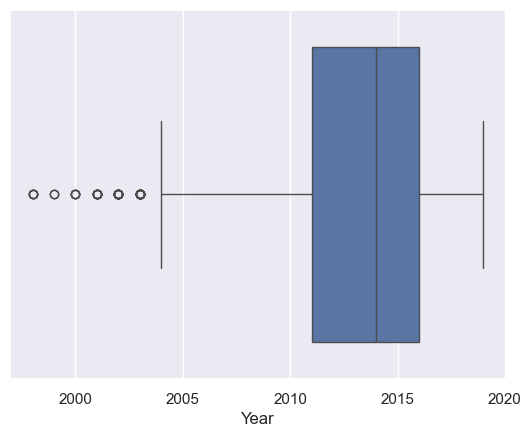

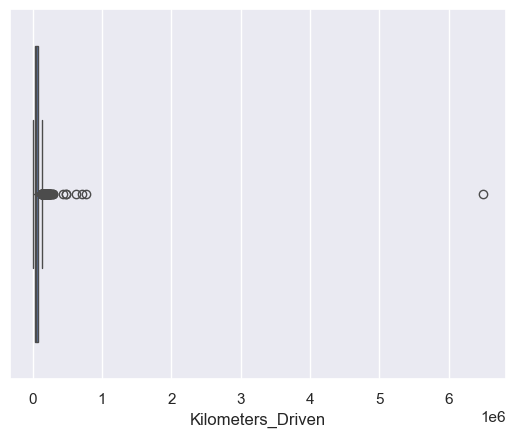

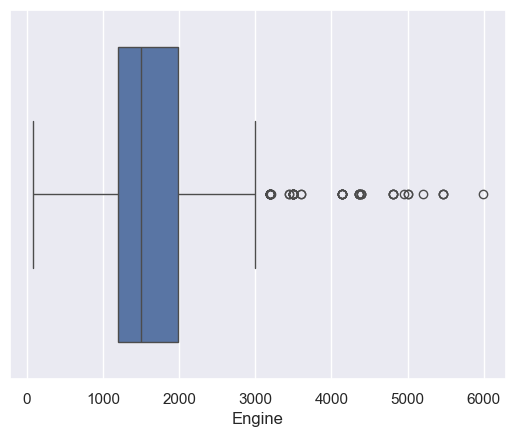

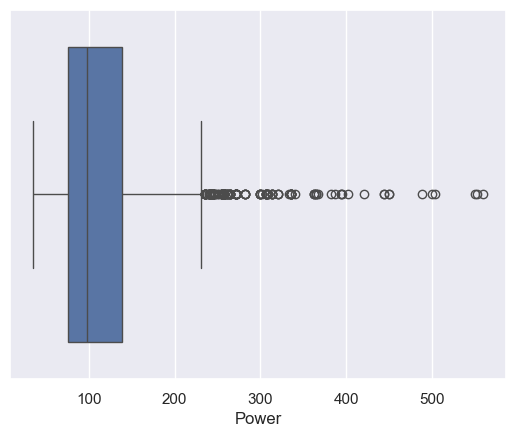

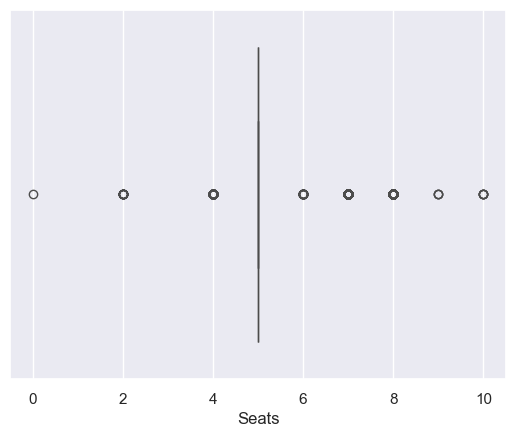

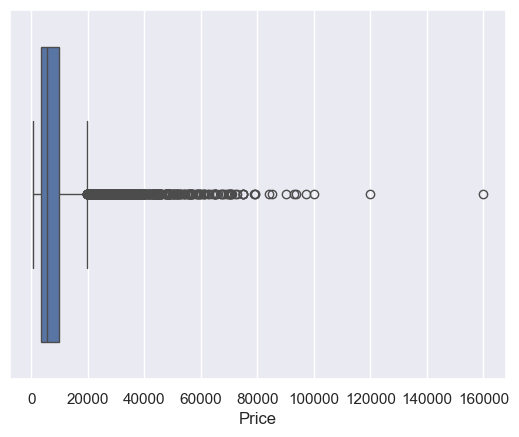

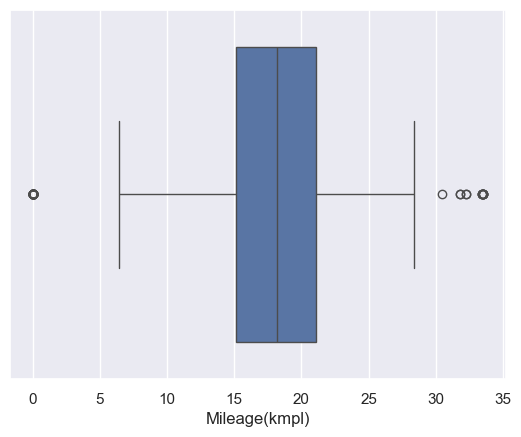

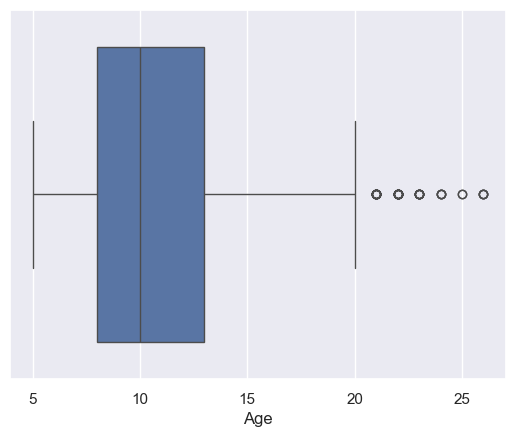

In [115]:
columns = train.select_dtypes(include=['number'])

#show Boxplots for numeric columns to detect the Outliers
for col in columns:
    sns.boxplot(x=train[col], data=train)
    plt.show()


In [116]:
# Handle Outliers
train = train[train["Kilometers_Driven"] < train["Kilometers_Driven"].quantile(0.999)]
train = train[train["Seats"] != 0]

In [117]:
# show the Quantiles to check the outlires again
train.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999 , 1])

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Mileage(kmpl),Age
0.250,2011.0,34000.0,1198.00,75.0000,5.0,3500.0,15.17,8.0
0.500,2014.0,53000.0,1493.00,97.7000,5.0,5640.0,18.15,10.0
0.750,2016.0,73000.0,1984.00,138.1000,5.0,9950.0,21.10,13.0
0.900,2017.0,96000.0,2494.00,184.0000,7.0,22500.0,24.00,15.0
0.950,2018.0,120000.0,2982.00,204.0000,7.0,32345.0,25.47,17.0
0.990,2019.0,170000.0,3050.74,287.7600,8.0,56000.0,28.09,20.0
0.999,2019.0,250000.0,5000.00,455.0292,9.0,89950.0,33.44,24.0
1.000,2019.0,300000.0,5998.00,560.0000,10.0,160000.0,33.54,26.0


In [118]:
#Show sample of Data
train.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage(kmpl),Brand,Model,Age
2789,Coimbatore,2018,25093,Petrol,Manual,First,1197.0,83.10,5.0,7760.0,21.40,Maruti,Baleno,6
1083,Kolkata,2015,45000,Diesel,Manual,First,1364.0,87.20,5.0,7350.0,21.43,Toyota,Corolla,9
3674,Coimbatore,2016,42225,Petrol,Manual,First,1196.0,73.00,7.0,4300.0,15.10,Maruti,Eeco,8
5182,Kolkata,2014,41000,Diesel,Manual,First,2149.0,139.07,7.0,8000.0,17.00,Force,One,10
1734,Kolkata,2014,32000,Diesel,Manual,First,1248.0,74.00,5.0,4350.0,23.40,Maruti,Swift,10


In [119]:
train.to_csv('train.csv', index=False)

# Data Spiliting

In [120]:
# Correlation with the target
train.select_dtypes(include=['number']).corr()["Price"].apply(lambda x: abs(x)).nlargest()

Price            1.000000
Power            0.772407
Engine           0.658171
Mileage(kmpl)    0.306660
Age              0.305076
Name: Price, dtype: float64

In [121]:
# Declare x & y
x = train.drop("Price" , axis=1)
y = train["Price"]

In [122]:
# Spiliting The Data
Data = train.copy()
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x , y , test_size=0.2 , random_state=42)
train_x.shape , test_x.shape ,train_y.shape , test_y.shape

((4808, 13), (1203, 13), (4808,), (1203,))

In [123]:
# Splitting Columns
num_cols = x.select_dtypes(include='number').columns.tolist()

cat_cols = x.select_dtypes(exclude='number').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Owner_Type']

ord_cols = ['Owner_Type']

print(num_cols)
print(cat_cols)
print(ord_cols)

['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Mileage(kmpl)', 'Age']
['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']
['Owner_Type']


# Data Preprossesing

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from category_encoders import BinaryEncoder

num_pipeline = make_pipeline(SimpleImputer(),
                            StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             BinaryEncoder())

ord_pipeline =  make_pipeline(OrdinalEncoder())

full_pipeline = ColumnTransformer(transformers=[ ("num", num_pipeline, num_cols),
                                                ("cat", cat_pipeline, cat_cols),
                                                ("ord", ord_pipeline , ord_cols)])

train_x_prepared = full_pipeline.fit_transform(train_x)
test_x_prepared = full_pipeline.transform(test_x)

# Model Building

In [125]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Linear Regression
lin_reg.fit(train_x_prepared, train_y)

print("Intercept =", lin_reg.intercept_)
print("Coef =", lin_reg.coef_)

Intercept = 11169.646530625809
Coef = [ 2.69948983e+16 -1.02400000e+03  1.12941550e+03  6.48911295e+03
 -1.16536406e+03 -8.71269077e+02  2.69948983e+16 -2.43878573e+02
 -5.05858842e+02 -2.33675650e+01  6.25909091e+02  3.73874805e+03
 -6.56036401e+02  2.13994864e+03 -1.06243470e+03  1.06243470e+03
  1.58507620e+03 -7.68808594e+02  1.83128125e+03 -2.76359375e+02
  5.77500000e+01  7.27187500e+02  3.34093750e+02 -7.10875000e+02
 -1.52115625e+03 -6.46500000e+02 -1.39962500e+03 -2.17437500e+02
  2.85000000e+01  1.80000000e+01]


In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
pred_y_train = lin_reg.predict(train_x_prepared)
pred_y_test = lin_reg.predict(test_x_prepared)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y_test)))
print('R2:', r2_score(test_y, pred_y_test))

RMSE: 5359.155809656348
R2: 0.7156649522938607


In [127]:
# Training & Testing Accuracy
print('Train Accuracy :', r2_score(train_y, pred_y_train))
print('Test Accuracy :', r2_score(test_y, pred_y_test))

Train Accuracy : 0.720708455166917
Test Accuracy : 0.7156649522938607


* polynomial features

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Creating polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_x_prepared)
X_test_poly = poly.transform(test_x_prepared)

# Fitting the linear regression model to the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_y)

# Calculating and printing the R^2 score for both training and testing data
print('Train Accuracy by poly:', lin_reg.score(X_train_poly, train_y))
print('Test Accuracy by poly:', lin_reg.score(X_test_poly, test_y))

Train Accuracy by poly: 0.9232011732473863
Test Accuracy by poly: -7.747789615509424e+16


* Gradient Descent

In [129]:
# Try Gradient Descent

from sklearn.linear_model import SGDRegressor

poly_sgd = make_pipeline(PolynomialFeatures(2), 
                         SGDRegressor(random_state=0, max_iter=10000, tol=1e-3, penalty='l2', alpha=10, eta0=0.01))

poly_sgd.fit(train_x_prepared, train_y)

# Predictions
y_pred = poly_sgd.predict(train_x_prepared)

# Model Evaluation
print('Training Accuracy:', poly_sgd.score(train_x_prepared, train_y))
print('Testing Accuracy:', poly_sgd.score(test_x_prepared, test_y))

Training Accuracy: 0.6332662741836892
Testing Accuracy: 0.626698848742768


* Ridge & Lasso

In [130]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # Create Ridge regression model with regularization parameter alpha
ridge_reg.fit(X_train_poly, train_y)  # Fit the model on the polynomial features

# Predicting using the test set
y_pred_ridge = ridge_reg.predict(X_test_poly)

# Calculating and printing R^2 score and RMSE
print('Test Accuracy (R^2) - Ridge:', r2_score(test_y, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(test_y, y_pred_ridge)))

Test Accuracy (R^2) - Ridge: 0.8842290416766985
RMSE: 3419.644818207159


In [131]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # Create Lasso regression model with regularization parameter alpha
lasso_reg.fit(X_train_poly, train_y)  # Fit the model on the polynomial features

# Predicting using the test set
y_pred_lasso = lasso_reg.predict(X_test_poly)

# Calculating and printing R^2 score and RMSE
print('Test Accuracy (R^2) - Lasso:', r2_score(test_y, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(test_y, y_pred_lasso)))

Test Accuracy (R^2) - Lasso: 0.8853132605397783
RMSE: 3403.594311803887


In [132]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Create ElasticNet model with regularization parameter alpha and l1_ratio
elasticnet_reg.fit(X_train_poly, train_y)  # Fit the model on the polynomial features

# Predicting using the test set
y_pred_elasticnet = elasticnet_reg.predict(X_test_poly)

# Calculating and printing R² score and RMSE
print('Test Accuracy (R²) - ElasticNet:', r2_score(test_y, y_pred_elasticnet))
print('RMSE:', np.sqrt(mean_squared_error(test_y, y_pred_elasticnet)))

Test Accuracy (R²) - ElasticNet: 0.8553769915904785
RMSE: 3822.0809580216733


In [133]:
alpha_values = [0.1, 1.0, 10.0, 100.0]

for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_poly, train_y)
    y_pred_ridge = ridge_reg.predict(X_test_poly)
    r2 = r2_score(test_y, y_pred_ridge)
    print(f'Alpha: {alpha}, R² Score: {r2:.2f}')

Alpha: 0.1, R² Score: 0.88
Alpha: 1.0, R² Score: 0.88
Alpha: 10.0, R² Score: 0.89
Alpha: 100.0, R² Score: 0.88


In [134]:
alpha_values = [0.1, 1.0, 10.0, 100.0]

for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_poly, train_y)
    y_pred_lasso = lasso_reg.predict(X_test_poly)
    r2 = r2_score(test_y, y_pred_lasso)
    print(f'Alpha: {alpha}, R² Score: {r2:.2f}')

Alpha: 0.1, R² Score: 0.88
Alpha: 1.0, R² Score: 0.89
Alpha: 10.0, R² Score: 0.89
Alpha: 100.0, R² Score: 0.85


In [135]:
degree_values = [1, 2, 3 ]

for degree in degree_values:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(train_x_prepared)
    X_test_poly = poly.transform(test_x_prepared)
    lasso_reg = Lasso(alpha=10)
    lasso_reg.fit(X_train_poly, train_y)
    y_pred = lasso_reg.predict(X_test_poly)
    r2 = r2_score(test_y, y_pred)
    print(f'Degree: {degree}, R² Score: {r2:.3f}')

Degree: 1, R² Score: 0.716
Degree: 2, R² Score: 0.886
Degree: 3, R² Score: 0.847


*Best Degree is "2" and Best Alpha for Ridge is "10"*

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_x_prepared)
X_test_poly = poly.transform(test_x_prepared)

Ridge_reg = Ridge(alpha=10)
Ridge_reg.fit(X_train_poly, train_y)

y_pred = Ridge_reg.predict(X_test_poly)
r2 = r2_score(test_y, y_pred)

print(f'R² Score: {r2:.2f}')

R² Score: 0.89


**This is best modul we had until now**

In [137]:
# Log Transform for the target
def log_transform(x):
    return np.log1p(x)

# Log Transform
y_train_log = log_transform(train_y)
y_test_log = log_transform(test_y)

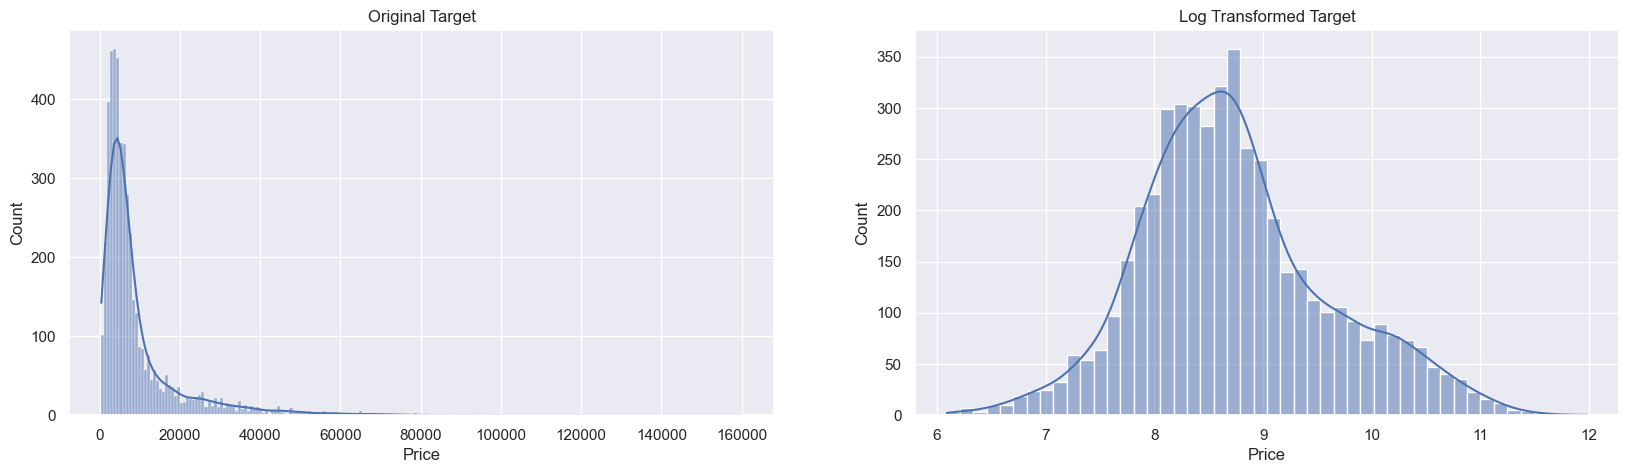

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(ax=axes[0], data=train_y, kde=True)
sns.histplot(ax=axes[1], data=y_train_log, kde=True)
axes[0].set_title('Original Target')
axes[1].set_title('Log Transformed Target')
plt.show()

In [139]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_x_prepared, y_train_log)

# Predictions
y_pred = lr.predict(train_x_prepared)

# Model Evaluation
print('Training Accuracy:', lr.score(train_x_prepared, y_train_log))
print('Testing Accuracy:', lr.score(test_x_prepared, y_test_log))

Training Accuracy: 0.8852437296908098
Testing Accuracy: 0.8796185726632743


In [140]:
poly_ridge = make_pipeline(PolynomialFeatures(2), Ridge(alpha=10))

# Fit the model
poly_ridge.fit(train_x_prepared, y_train_log)

# Predict on the test data
y_pred = poly_ridge.predict(test_x_prepared)

# Calculate R² scores directly using the model's score method
print('Training R² Score:', poly_ridge.score(train_x_prepared, y_train_log))
print('Testing R² Score:', poly_ridge.score(test_x_prepared, y_test_log))

Training R² Score: 0.9514249353801548
Testing R² Score: 0.9381210568117342


# Saving The Pipline & Model

In [141]:
import joblib

joblib.dump(full_pipeline, 'full_pipeline.pkl')
joblib.dump(poly_ridge, 'poly_ridge_model.pkl')


['poly_ridge_model.pkl']

# Test The Modul

In [142]:
import joblib
import numpy as np

# Load the full pipeline and model
loaded_full_pipeline = joblib.load('full_pipeline.pkl')
loaded_poly_ridge = joblib.load('poly_ridge_model.pkl')

# Assume you have new data to predict on (a single row)
new_data = test_x.iloc[:1]

# Preprocess the new data
new_data_prepared = loaded_full_pipeline.transform(new_data)

# Make predictions
y_pred_new = loaded_poly_ridge.predict(new_data_prepared)

# If you need to reverse the log transformation
def inverse_log_transform(x):
    return np.expm1(x)

# Reverse the log transformation to get original scale predictions
y_pred_new_original = inverse_log_transform(y_pred_new)

# Display predictions
print(y_pred_new_original)


[1181.13757358]


* **We Are Done ✅**

# Make Web App

In [143]:
%%writefile cars_app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load The Model And Pipeline
fl_pipeline = joblib.load('full_pipeline.pkl')
lr_model = joblib.load('poly_ridge_model.pkl')

# Load The Data
data = pd.read_csv("train.csv")

# Title 
st.title("🚗 Used Cars Price Prediction 🚗")
st.subheader("This App is built using a Linear Regression Model to predict the price of used cars.")

# Take Input From The User
Brand = st.selectbox("Brand", data["Brand"].unique())

Model = st.selectbox("Model", data["Model"].unique())

Fuel_Type = st.radio("Fuel Type", data["Fuel_Type"].unique())

Transmission = st.radio("Transmission", data["Transmission"].unique())

Power = st.slider(
    "Power", 
    int(data["Power"].min()),  
    int(data["Power"].max()),  
    int(data["Power"].median()) )

Engine = st.slider(
    "Engine", 
    int(data["Engine"].min()),  
    int(data["Engine"].max()),  
    int(data["Engine"].median()) )

Mileage_kmpl = Engine = st.slider(
    "Mileage(kmpl)", 
    int(data["Mileage(kmpl)"].min()),  
    int(data["Mileage(kmpl)"].max()),  
    int(data["Mileage(kmpl)"].median()) )

Kilometers_Driven = st.slider(
    "Kilometers Driven", 
    int(data["Kilometers_Driven"].min()),  
    int(data["Kilometers_Driven"].max()),  
    int(data["Kilometers_Driven"].median()) )

Location = st.selectbox("Location", data["Location"].unique())

Year = st.selectbox("Model Year", sorted(data["Year"].unique()))

Owner_Type = st.radio("Owner Type", data["Owner_Type"].unique())

Seats = st.selectbox("Number of Seats", sorted(data["Seats"].unique()))

Age = st.number_input("Age The Car", min_value=0, max_value=26, value=0, step=1)

# Store The Inputs as Dictionary
inputs = {"Brand" : Brand ,
          "Model" : Model ,
          "Fuel_Type" : Fuel_Type ,
          "Transmission" : Transmission ,
          "Power" : Power ,
          "Engine" : Engine ,
          "Mileage(kmpl)" : Mileage_kmpl ,
          "Kilometers_Driven" : Kilometers_Driven ,
          "Location" : Location , 
          "Year" : Year ,
          "Owner_Type" : Owner_Type ,
          "Seats" : Seats ,
          "Age" : Age}

# Transform the data into a DataFrame
features = pd.DataFrame(inputs, index=[0])  

# Pipeline transformation
features_prepared = fl_pipeline.transform(features)

# Predictions
prediction = lr_model.predict(features_prepared)[0]

# Display the prediction
st.subheader('Prediction Price This Car is:')
st.markdown(f'### $ {round(prediction, 2)}')

Writing cars_app.py


# Create Requirements File

In [148]:
!pipreqs "C:\Users\hpc\OneDrive\Desktop\DT\ML\Used Car app ml"

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in C:\Users\hpc\OneDrive\Desktop\DT\ML\Used Car app ml\requirements.txt
